## Graph Theory
We have following implementations in this file
1. Creating graphs by `Adjacency Matrix` and `Adjacency List` methods.
2. Getting the graph
3. Graph Traversals - BFS & DFS

In [144]:
import random
import graphviz
from collections import deque
random.seed(42)

#### GraphViz method to visualize the graphs

In [170]:
def display_graph(nodes, edges, directed):
  if directed:
    dot = graphviz.Digraph(comment='Graph view', graph_attr={'rankdir': 'LR'})
  else:
    dot = graphviz.Graph(comment='Graph view', graph_attr={'rankdir': 'LR'})

  for node in nodes:
    dot.node(name=str(node), label=str(node))

  edges_to_draw = set()
  for edge in edges:
    if not directed:
      edges_to_draw.add(tuple(sorted(edge)))
    else:
      edges_to_draw.add(edge)
  
  for edge in edges_to_draw:
    dot.edge(str(edge[0]), str(edge[1]))
    
  return dot

### Adjacency Matrix

In [87]:
class GraphMatrix:
    def __init__(self, n_vertices: int, directed: bool = False):
        self.n_vertices = n_vertices
        # Create a 2D adjacency matrix initialized with 0s
        self.adj_matrix = [[0] * n_vertices for _ in range(n_vertices)]
        self.directed = directed
    
    def insert_edge(self, x, y):
        """
        Create an edge between x and y vertices, based on directed flag
        """
        self.adj_matrix[x][y] = 1 # turn this on
        
        if not self.directed:
            # for undirected graph - (x,y) and (y,x) both edges exist
            self.adj_matrix[y][x] = 1
       
    def get_neighbors(self, x):
        """
        For given vertex x, return all its neigbors (adjacent vertices)
        """ 
        neighbors = []
        for col in range(self.n_vertices):
            if self.adj_matrix[x][col] == 1:
                neighbors.append(col)
        return neighbors
    
    def check_edge(self, x, y):
        """
        Checks weather a connection is present from x to y
        """
        if self.adj_matrix[x][y] == 1:
            return True
        else:
            return False
    
    def degree(self, x):
        in_degree = 0
        out_degree = 0
        for col in range(self.n_vertices):
            if self.adj_matrix[x][col] == 1:
                out_degree += 1
        if self.directed:
            # also count in_degrees
            for row in range(self.n_vertices):
                if self.adj_matrix[row][x] == 1:
                    in_degree += 1
                    
        return (out_degree, in_degree)
    
    def get_all_edges(self):
        edges = []
        for row in range(self.n_vertices):
            for col in range(self.n_vertices):
                if self.adj_matrix[row][col] == 1:
                    edges.append((row, col))
                    
        return edges

In [88]:
n_vertices = 10
graph_matrix = GraphMatrix(n_vertices, directed=True)

In [89]:
graph_matrix.adj_matrix

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [90]:
for i in range(n_vertices):
    for i in range(n_vertices):
        n = random.randint(0, n_vertices-1)
        if n != i:
            graph_matrix.insert_edge(i, n)

In [91]:
graph_matrix.adj_matrix

[[0, 1, 0, 1, 1, 1, 1, 0, 1, 0],
 [1, 0, 0, 1, 1, 0, 0, 0, 1, 1],
 [1, 0, 0, 0, 1, 1, 1, 0, 0, 1],
 [1, 1, 1, 0, 1, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 1, 0, 1, 1, 0],
 [1, 1, 1, 1, 0, 0, 1, 0, 1, 1],
 [1, 1, 1, 0, 1, 1, 0, 1, 1, 0],
 [1, 0, 1, 1, 0, 1, 1, 0, 1, 1],
 [1, 1, 1, 0, 1, 1, 1, 0, 0, 0],
 [0, 1, 1, 1, 1, 1, 1, 0, 1, 0]]

In [92]:
graph_matrix.get_neighbors(1)

[0, 3, 4, 8, 9]

In [93]:
graph_matrix.get_neighbors(2)

[0, 4, 5, 6, 9]

In [94]:
graph_matrix.check_edge(1, 7)

False

In [95]:
graph_matrix.check_edge(1, 5)

False

In [96]:
graph_matrix.directed

True

In [97]:
print(graph_matrix.get_all_edges())

[(0, 1), (0, 3), (0, 4), (0, 5), (0, 6), (0, 8), (1, 0), (1, 3), (1, 4), (1, 8), (1, 9), (2, 0), (2, 4), (2, 5), (2, 6), (2, 9), (3, 0), (3, 1), (3, 2), (3, 4), (3, 9), (4, 3), (4, 5), (4, 7), (4, 8), (5, 0), (5, 1), (5, 2), (5, 3), (5, 6), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 4), (6, 5), (6, 7), (6, 8), (7, 0), (7, 2), (7, 3), (7, 5), (7, 6), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 4), (8, 5), (8, 6), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 8)]


### Adjacency List

In [160]:
class GraphList:
    def __init__(self, n_vertices, directed=False):
        self.n_vertices = n_vertices
        self.adj_list = {}
        self.directed = directed
        for i in range(self.n_vertices):
            self.adj_list[i] = []
        self.edges = []
    
    def insert_edge(self, x, y):
        self.adj_list[x].append(y)
        self.edges.append((x,y))
        
        if not self.directed:
            self.adj_list[y].append(x)
            self.edges.append((y, x))
    
    def __repr__(self):
        return f"Graph({self.adj_list})"
    
    def get_neighbors(self, x):
        return self.adj_list[x]
    
    def check_edge(self, x, y):
        neighbors_x = self.adj_list[x]
        
        if y in neighbors_x:
            return True
        else:
            return False
    
    def graph_view(self):
        return display_graph(range(self.n_vertices), self.edges, self.directed)
        

In [161]:
graph_list = GraphList(n_vertices, directed=False)

In [162]:
graph_list

Graph({0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []})

In [163]:
edges = [
    (0, 1), (0, 3),
    (1, 2), (1, 4),
    (2, 5), (2, 8),
    (3, 6), (3, 7),
    (4, 7), (4, 8),
    (5, 9),
    (6, 9),
    (7, 8),
    (8, 9)
]
for edge in edges:
    graph_list.insert_edge(edge[0], edge[1])

In [164]:
graph_list

Graph({0: [1, 3], 1: [0, 2, 4], 2: [1, 5, 8], 3: [0, 6, 7], 4: [1, 7, 8], 5: [2, 9], 6: [3, 9], 7: [3, 4, 8], 8: [2, 4, 7, 9], 9: [5, 6, 8]})

In [174]:
graph_list.get_neighbors(9)

[5, 6, 8]

In [166]:
graph_list.check_edge(1, 9)

False

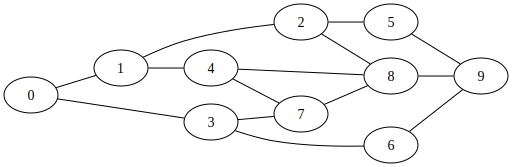

In [171]:
graph_list.graph_view()

### Breadth First Search (BFS)

There are two important concepts to keep in mind -
1. `Visited` set of nodes so that we don't visit them again and also we can return this list to show all the nodes that are reachable from `start`
2. `Explored` set of nodes which tell what all nodes have been fully explored. It is marked so when we have fully visited all its adjacent nodes.

In [205]:
def BFS(graph: GraphList, start, end=None):
    """
    graph: the graph data structure (adj list) which needs to be traversed
    start: the starting vertex from where we start traversal
    """
    # first time we see a node, it gets visited, we dont need to visit it again
    # it can be a dict, list or a set
    visited = []
    
    # whatever node has to be explored in future goes into this queue
    # this acts as a source of truth for which nodes can/need to be explored
    queue = deque()
    
    # to record parents
    parents = {}
    
    queue.append(start)
    visited.append(start)
    
    parents[start] = -1
    
    # while there is something to explore, keep exploring and be mindful about visited nodes
    while queue:
        to_explore = queue.popleft()
        
        # exploration means visiting all its adjacent nodes (neighbors)
        for neighbor in graph.get_neighbors(to_explore):
            if neighbor not in visited:
                
                # this neighbor got found from to_explore so thats the parent
                parents[neighbor] = to_explore
                
                visited.append(neighbor)
                # add it to queue to explore it in future
                queue.append(neighbor)
    
    # find path from start to end
    path = []
    if end is not None:
        path.append(end)
        marker = end
        while parents[marker] != -1:
            marker = parents[marker]
            path.append(marker)

        path = path[::-1]
        
    return {"visited": visited, "parents": parents, "path": path}

In [207]:
BFS(graph_list, 6, 9)

{'visited': [6, 3, 9, 0, 7, 5, 8, 1, 4, 2],
 'parents': {6: -1, 3: 6, 9: 6, 0: 3, 7: 3, 5: 9, 8: 9, 1: 0, 4: 7, 2: 5},
 'path': [6, 9]}